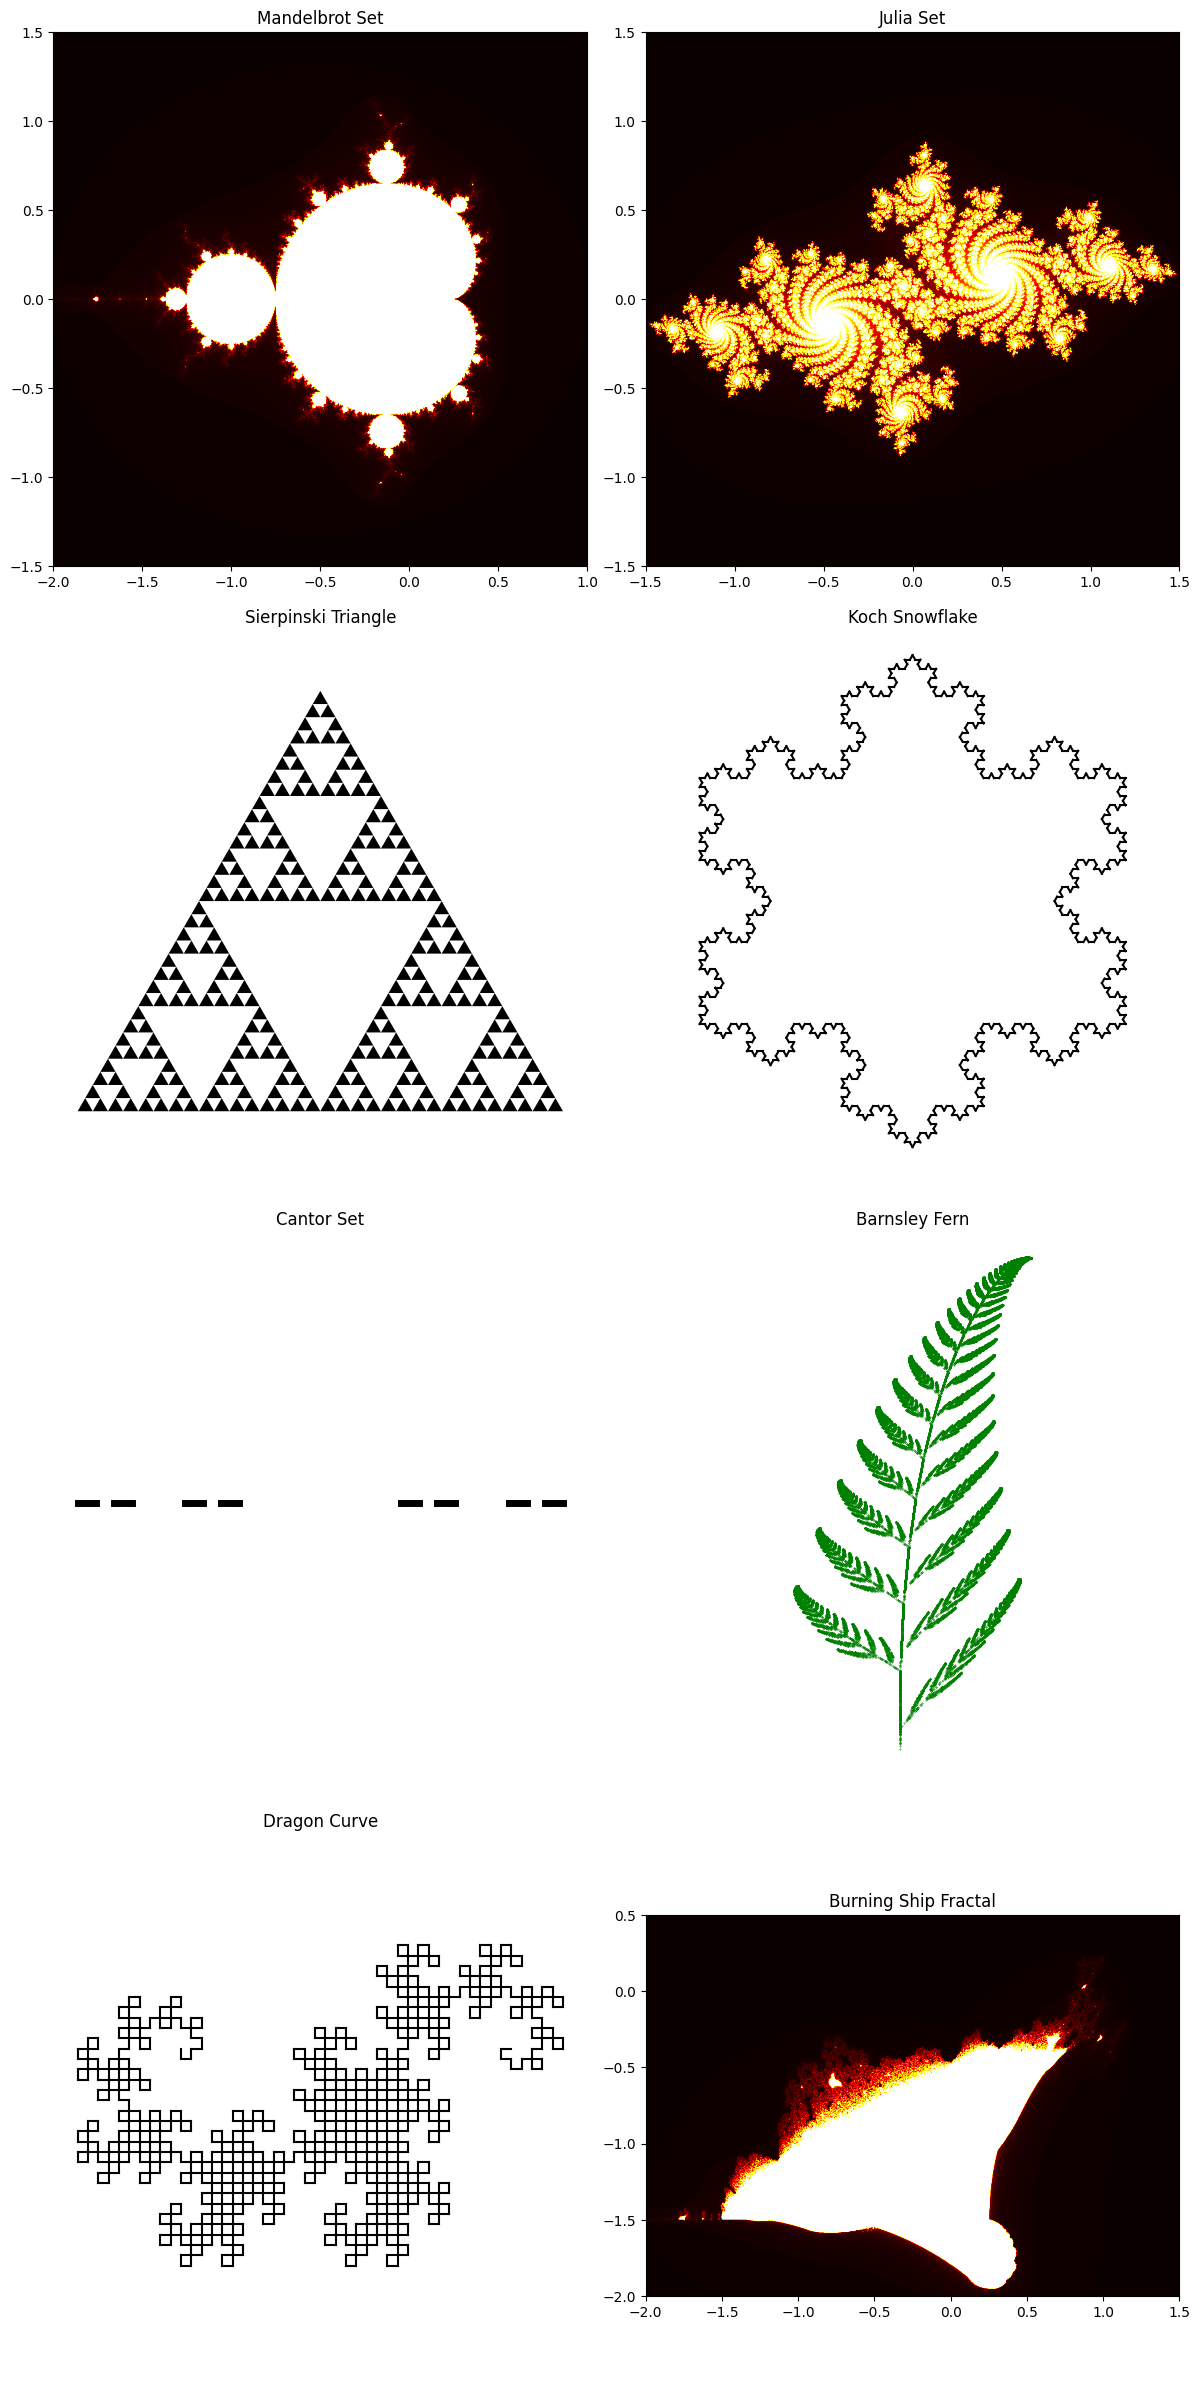

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Mandelbrot set
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1, r2, np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]))

# Julia set
def julia(c, z, max_iter):
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def julia_set(c, xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1, r2, np.array([[julia(c, complex(r, i), max_iter) for r in r1] for i in r2]))

# Sierpinski triangle
def sierpinski(order, ax, p1, p2, p3):
    if order == 0:
        ax.fill([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], 'k')
    else:
        sierpinski(order-1, ax, p1, midpoint(p1, p2), midpoint(p1, p3))
        sierpinski(order-1, ax, p2, midpoint(p2, p1), midpoint(p2, p3))
        sierpinski(order-1, ax, p3, midpoint(p3, p1), midpoint(p3, p2))

def midpoint(p1, p2):
    return [(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]

# Koch snowflake
def koch_snowflake(order, ax, p1, p2):
    if order == 0:
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k')
    else:
        p3 = [(2*p1[0]+p2[0])/3, (2*p1[1]+p2[1])/3]
        p5 = [(p1[0]+2*p2[0])/3, (p1[1]+2*p2[1])/3]
        p4 = [(p3[0]+p5[0])/2 - (p3[1]-p5[1])*np.sqrt(3)/2, (p3[1]+p5[1])/2 + (p3[0]-p5[0])*np.sqrt(3)/2]
        koch_snowflake(order-1, ax, p1, p3)
        koch_snowflake(order-1, ax, p3, p4)
        koch_snowflake(order-1, ax, p4, p5)
        koch_snowflake(order-1, ax, p5, p2)

# Cantor set
def cantor_set(ax, x, y, length, order):
    if order == 0:
        ax.plot([x, x + length], [y, y], 'k', lw=5)
    else:
        cantor_set(ax, x, y, length / 3, order - 1)
        cantor_set(ax, x + 2 * length / 3, y, length / 3, order - 1)

# Barnsley fern
def barnsley_fern(n):
    x, y = [0], [0]
    for _ in range(n):
        r = np.random.random()
        if r < 0.01:
            x.append(0)
            y.append(0.16 * y[-1])
        elif r < 0.86:
            x.append(0.85 * x[-1] + 0.04 * y[-1])
            y.append(-0.04 * x[-1] + 0.85 * y[-1] + 1.6)
        elif r < 0.93:
            x.append(0.2 * x[-1] - 0.26 * y[-1])
            y.append(0.23 * x[-1] + 0.22 * y[-1] + 1.6)
        else:
            x.append(-0.15 * x[-1] + 0.28 * y[-1])
            y.append(0.26 * x[-1] + 0.24 * y[-1] + 0.44)
    return x, y

# Dragon curve
def dragon_curve(order, ax, p1, p2):
    if order == 0:
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k')
    else:
        p = [(p1[0] + p2[0]) / 2 + (p2[1] - p1[1]) / 2, (p1[1] + p2[1]) / 2 - (p2[0] - p1[0]) / 2]
        dragon_curve(order-1, ax, p1, p)
        dragon_curve(order-1, ax, p2, p)

# Burning Ship fractal
def burning_ship(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = complex(abs(z.real), abs(z.imag))**2 + c
    return max_iter

def burning_ship_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1, r2, np.array([[burning_ship(complex(r, i), max_iter) for r in r1] for i in r2]))

# Plotting functions
def plot_fractals():
    fig, axes = plt.subplots(4, 2, figsize=(12, 24))

    # Mandelbrot set
    r1, r2, mandelbrot_img = mandelbrot_set(-2.0, 1.0, -1.5, 1.5, 800, 800, 256)
    axes[0, 0].imshow(mandelbrot_img, extent=(r1.min(), r1.max(), r2.min(), r2.max()), cmap='hot')
    axes[0, 0].set_title("Mandelbrot Set")

    # Julia set
    r1, r2, julia_img = julia_set(complex(-0.7, 0.27015), -1.5, 1.5, -1.5, 1.5, 800, 800, 256)
    axes[0, 1].imshow(julia_img, extent=(r1.min(), r1.max(), r2.min(), r2.max()), cmap='hot')
    axes[0, 1].set_title("Julia Set")

    # Sierpinski triangle
    sierpinski(5, axes[1, 0], [0, 0], [1, np.sqrt(3)], [2, 0])
    axes[1, 0].set_title("Sierpinski Triangle")
    axes[1, 0].axis('equal')
    axes[1, 0].axis('off')

    # Koch snowflake
    koch_snowflake(4, axes[1, 1], [0, 0], [1, 0])
    koch_snowflake(4, axes[1, 1], [1, 0], [0.5, np.sqrt(3)/2])
    koch_snowflake(4, axes[1, 1], [0.5, np.sqrt(3)/2], [0, 0])
    axes[1, 1].set_title("Koch Snowflake")
    axes[1, 1].axis('equal')
    axes[1, 1].axis('off')

    # Cantor set
    cantor_set(axes[2, 0], 0, 0, 1, 5)
    axes[2, 0].set_title("Cantor Set")
    axes[2, 0].axis('equal')
    axes[2, 0].axis('off')

    # Barnsley fern
    x, y = barnsley_fern(50000)
    axes[2, 1].scatter(x, y, s=0.1, color='green')
    axes[2, 1].set_title("Barnsley Fern")
    axes[2, 1].axis('equal')
    axes[2, 1].axis('off')

    # Dragon curve
    dragon_curve(10, axes[3, 0], [0, 0], [1, 0])
    axes[3, 0].set_title("Dragon Curve")
    axes[3, 0].axis('equal')
    axes[3, 0].axis('off')

    # Burning Ship fractal
    r1, r2, burning_ship_img = burning_ship_set(-2.0, 1.5, -2.0, 0.5, 800, 800, 256)
    axes[3, 1].imshow(burning_ship_img, extent=(r1.min(), r1.max(), r2.min(), r2.max()), cmap='hot')
    axes[3, 1].set_title("Burning Ship Fractal")

    plt.tight_layout()
    plt.show()

plot_fractals()
